# **import necessary libraries**

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/kaggle/input/monksent/monk_sent_Training_data.csv')


In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.15, random_state=42)

# **Extract features from text using CountVectorizer and TfidfTransformer and SMOTE**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

# Convert text data to numerical features using CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

# Apply TF-IDF transformation to the numerical features
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=9)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train.ravel())

# Continue with the rest of your code using X_train_resampled and y_train_resampled


In [ ]:

print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train==2)))


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))

Before OverSampling, counts of label '0': 1102
Before OverSampling, counts of label '1': 944 

Before OverSampling, counts of label '2': 2717 

After OverSampling, the shape of train_X: (8151, 7008)
After OverSampling, the shape of train_y: (8151,) 

After OverSampling, counts of label '0': 2717
After OverSampling, counts of label '1': 2717
After OverSampling, counts of label '2': 2717


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size= 0.15, random_state= 0)

In [ ]:
X_train_res.shape

(8151, 7008)

In [ ]:
X, y = make_classification(n_samples=8151, n_features=4, n_classes=3, n_clusters_per_class=1, random_state=42)

Epoch [1/8], Train Loss: 0.5812, Val Loss: 0.3527, Train Accuracy: 0.7718, Val Accuracy: 0.8733
Epoch [2/8], Train Loss: 0.1722, Val Loss: 0.3281, Train Accuracy: 0.9398, Val Accuracy: 0.8929
Epoch [3/8], Train Loss: 0.0749, Val Loss: 0.3958, Train Accuracy: 0.9750, Val Accuracy: 0.8962
Epoch [4/8], Train Loss: 0.0439, Val Loss: 0.4241, Train Accuracy: 0.9850, Val Accuracy: 0.8937
Epoch [5/8], Train Loss: 0.0281, Val Loss: 0.5108, Train Accuracy: 0.9906, Val Accuracy: 0.8937
Epoch [6/8], Train Loss: 0.0204, Val Loss: 0.4696, Train Accuracy: 0.9916, Val Accuracy: 0.8986
Epoch [7/8], Train Loss: 0.0179, Val Loss: 0.4563, Train Accuracy: 0.9929, Val Accuracy: 0.9052
Epoch [8/8], Train Loss: 0.0140, Val Loss: 0.4302, Train Accuracy: 0.9935, Val Accuracy: 0.9125


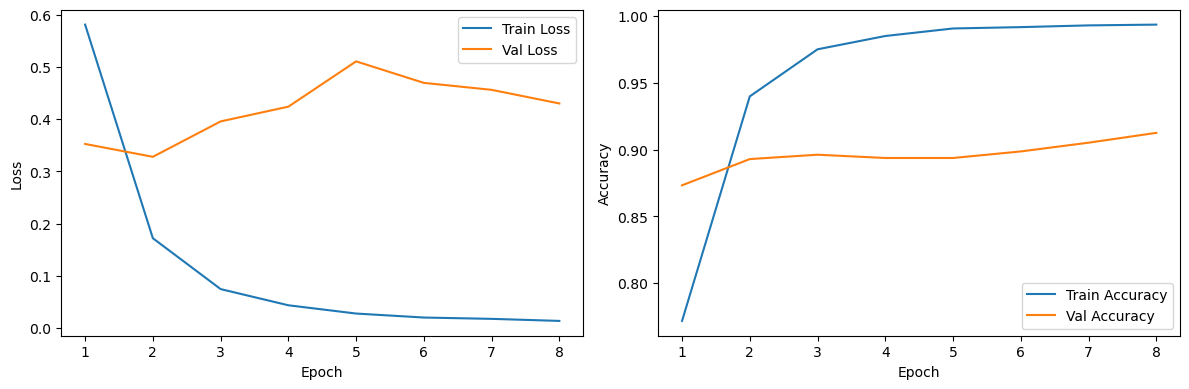

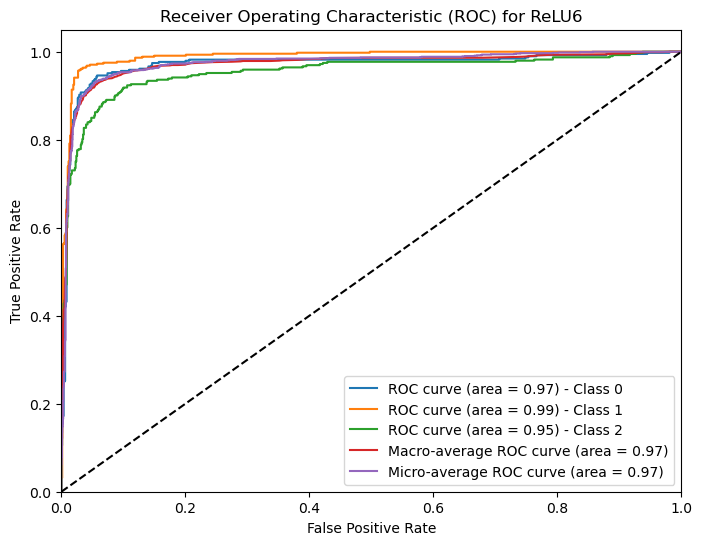

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       389
           1       0.94      0.96      0.95       441
           2       0.90      0.84      0.87       393

    accuracy                           0.91      1223
   macro avg       0.91      0.91      0.91      1223
weighted avg       0.91      0.91      0.91      1223

Accuracy: 0.9125102207686018


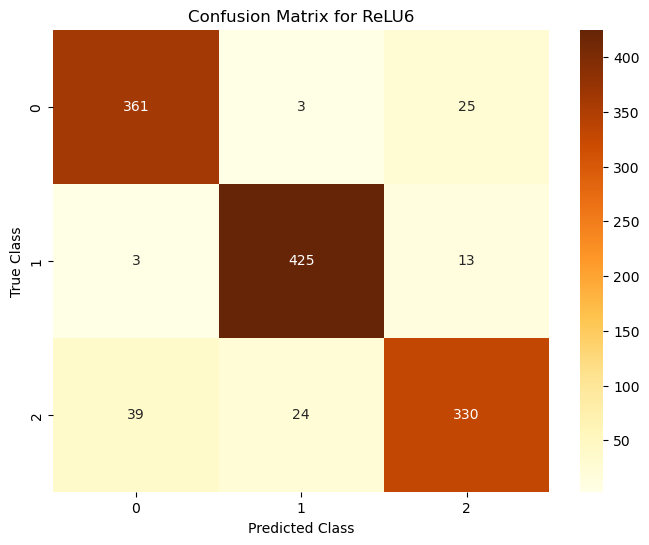

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate synthetic multi-class dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train.toarray())
X_test = torch.Tensor(X_test.toarray())
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the deep neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 512)  # Adjust input size to match the number of features
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 3)  # 3 output classes



    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu6(self.fc3(x))
        x = F.relu6(self.fc4(x))
        x = self.fc5(x)
        x = F.relu(x)
        return x

# Create an instance of the neural network model
dnn_classifier = NeuralNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dnn_classifier.parameters(), lr=0.001)

# Train the deep neural network
num_epochs = 8
batch_size = 32
num_batches = len(X_train) // batch_size

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0
    epoch_train_correct = 0
    epoch_val_correct = 0

    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        inputs = X_train[start_idx:end_idx]
        targets = y_train[start_idx:end_idx]

        # Forward pass
        outputs = dnn_classifier(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item() * inputs.size(0)
        epoch_train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()

    epoch_train_loss /= len(X_train)
    epoch_train_accuracy = epoch_train_correct / len(X_train)

    with torch.no_grad():
        dnn_classifier.eval()
        val_outputs = dnn_classifier(X_test)
        val_loss = criterion(val_outputs, y_test)
        val_predictions = torch.argmax(val_outputs, dim=1)
        val_accuracy = torch.sum(val_predictions == y_test).item() / len(X_test)

    train_losses.append(epoch_train_loss)
    val_losses.append(val_loss.item())
    train_accuracies.append(epoch_train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss.item():.4f}, "
          f"Train Accuracy: {epoch_train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the trained model
with torch.no_grad():
    dnn_classifier.eval()
    y_scores = F.softmax(dnn_classifier(X_test), dim=1).numpy()

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

classes = np.unique(y)

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_scores[:, i])

# Compute macro-average ROC curve and ROC area
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(len(classes)):
    tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= len(classes)
roc_auc_macro = roc_auc_score(y_test_bin, y_scores, average='macro')

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_scores, average='micro')

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) - Class %d' % (roc_auc[i], i))

# Plot macro-average ROC curve
plt.plot(fpr_macro, tpr_macro, label='Macro-average ROC curve (area = %0.2f)' % roc_auc_macro)

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for ReLU6')
plt.legend(loc="lower right")
plt.show()

# Predict the labels for the test set
with torch.no_grad():
    dnn_classifier.eval()
    y_pred = dnn_classifier(X_test)
    y_pred = torch.argmax(y_pred, dim=1).numpy()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix for ReLU6")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


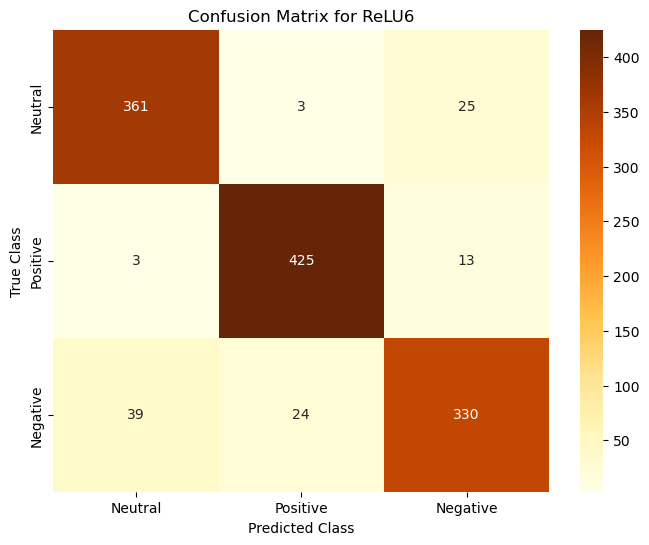

In [ ]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"],
            vmin=np.min(conf_mat), vmax=np.max(conf_mat))

plt.title("Confusion Matrix for ReLU6")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


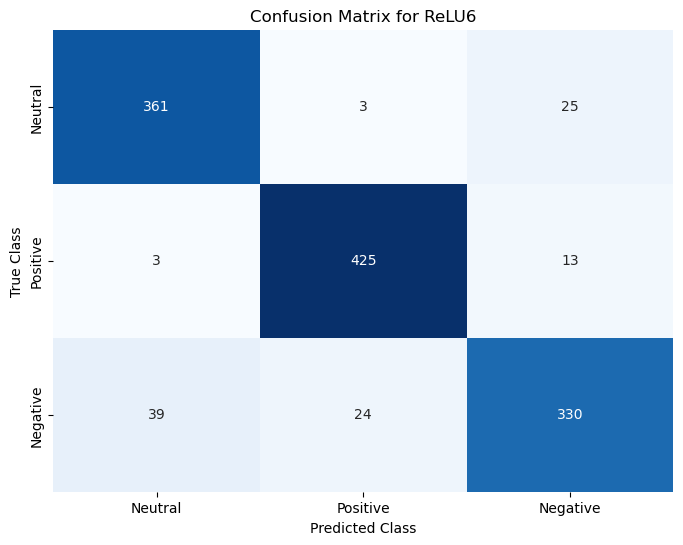

In [ ]:
import numpy as np

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"],
            vmin=np.min(conf_mat), vmax=np.max(conf_mat))
plt.title("Confusion Matrix for ReLU6")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


Epoch [1/7], Train Loss: 0.5643, Val Loss: 0.3352, Train Accuracy: 0.7761, Val Accuracy: 0.8806
Epoch [2/7], Train Loss: 0.1680, Val Loss: 0.3106, Train Accuracy: 0.9413, Val Accuracy: 0.9060
Epoch [3/7], Train Loss: 0.0780, Val Loss: 0.4406, Train Accuracy: 0.9730, Val Accuracy: 0.8962
Epoch [4/7], Train Loss: 0.0458, Val Loss: 0.5839, Train Accuracy: 0.9820, Val Accuracy: 0.8913
Epoch [5/7], Train Loss: 0.0286, Val Loss: 0.5107, Train Accuracy: 0.9890, Val Accuracy: 0.9027
Epoch [6/7], Train Loss: 0.0187, Val Loss: 0.4796, Train Accuracy: 0.9918, Val Accuracy: 0.9158
Epoch [7/7], Train Loss: 0.0157, Val Loss: 0.5176, Train Accuracy: 0.9923, Val Accuracy: 0.9182


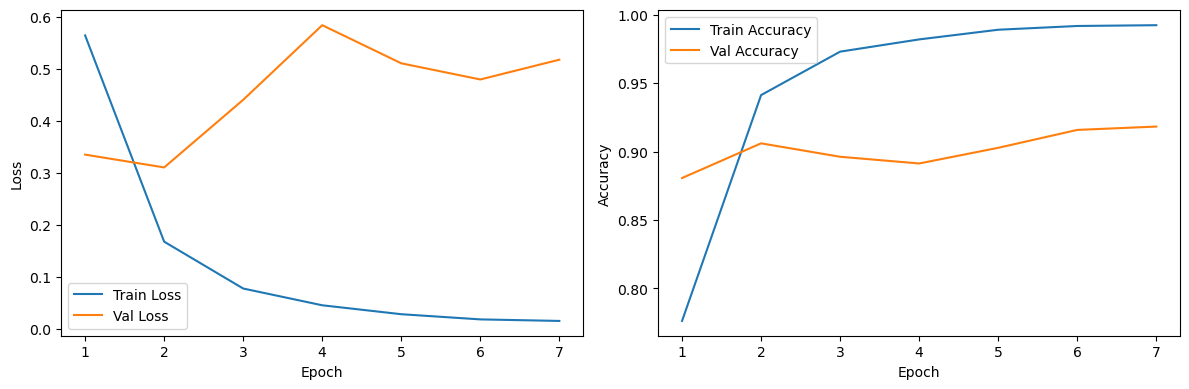

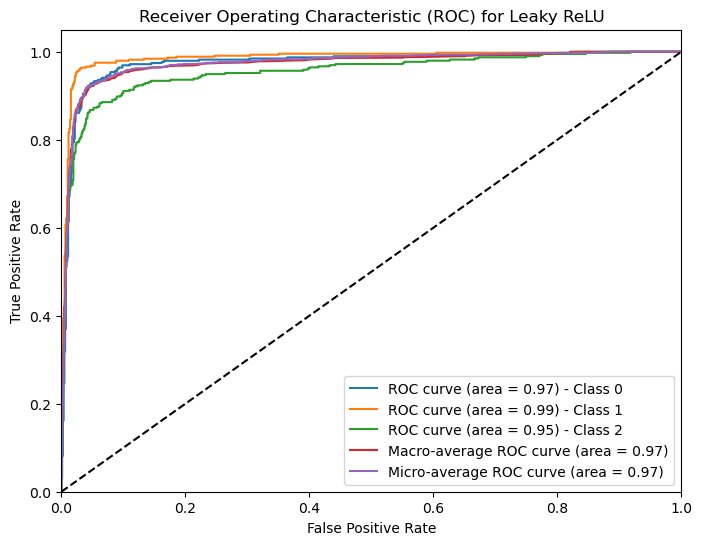

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       389
           1       0.94      0.96      0.95       441
           2       0.91      0.86      0.88       393

    accuracy                           0.92      1223
   macro avg       0.92      0.92      0.92      1223
weighted avg       0.92      0.92      0.92      1223

Accuracy: 0.9182338511856092


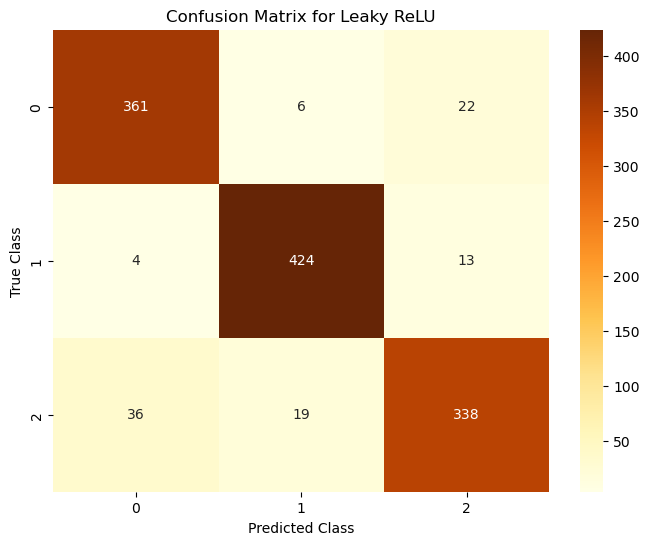

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate synthetic multi-class dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train.toarray())
X_test = torch.Tensor(X_test.toarray())
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the deep neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 512)  # Adjust input size to match the number of features
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 3)  # 3 output classes



    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = F.leaky_relu(self.fc4(x))
        x = self.fc5(x)
        x = F.leaky_relu(x)
        return x

# Create an instance of the neural network model
dnn_classifier = NeuralNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dnn_classifier.parameters(), lr=0.001)

# Train the deep neural network
num_epochs = 7
batch_size = 32
num_batches = len(X_train) // batch_size

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0
    epoch_train_correct = 0
    epoch_val_correct = 0

    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        inputs = X_train[start_idx:end_idx]
        targets = y_train[start_idx:end_idx]

        # Forward pass
        outputs = dnn_classifier(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item() * inputs.size(0)
        epoch_train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()

    epoch_train_loss /= len(X_train)
    epoch_train_accuracy = epoch_train_correct / len(X_train)

    with torch.no_grad():
        dnn_classifier.eval()
        val_outputs = dnn_classifier(X_test)
        val_loss = criterion(val_outputs, y_test)
        val_predictions = torch.argmax(val_outputs, dim=1)
        val_accuracy = torch.sum(val_predictions == y_test).item() / len(X_test)

    train_losses.append(epoch_train_loss)
    val_losses.append(val_loss.item())
    train_accuracies.append(epoch_train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss.item():.4f}, "
          f"Train Accuracy: {epoch_train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the trained model
with torch.no_grad():
    dnn_classifier.eval()
    y_scores = F.softmax(dnn_classifier(X_test), dim=1).numpy()

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

classes = np.unique(y)

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_scores[:, i])

# Compute macro-average ROC curve and ROC area
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(len(classes)):
    tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= len(classes)
roc_auc_macro = roc_auc_score(y_test_bin, y_scores, average='macro')

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_scores, average='micro')

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) - Class %d' % (roc_auc[i], i))

# Plot macro-average ROC curve
plt.plot(fpr_macro, tpr_macro, label='Macro-average ROC curve (area = %0.2f)' % roc_auc_macro)

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Leaky ReLU')
plt.legend(loc="lower right")
plt.show()

# Predict the labels for the test set
with torch.no_grad():
    dnn_classifier.eval()
    y_pred = dnn_classifier(X_test)
    y_pred = torch.argmax(y_pred, dim=1).numpy()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix for Leaky ReLU")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()



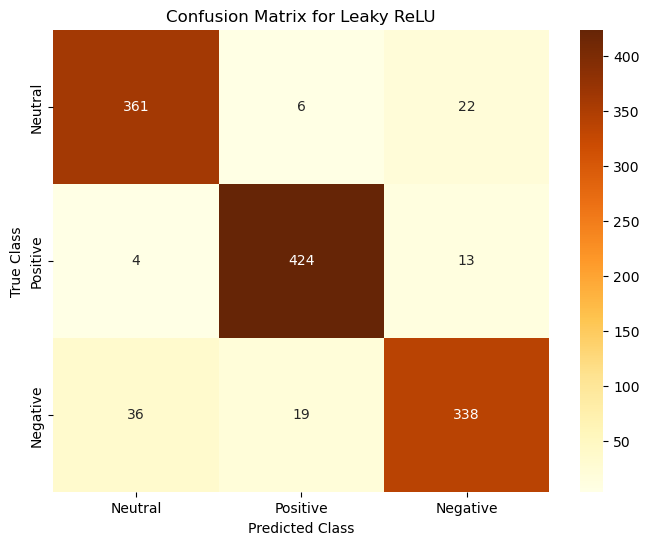

In [ ]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"],
            vmin=np.min(conf_mat), vmax=np.max(conf_mat))

plt.title("Confusion Matrix for Leaky ReLU")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


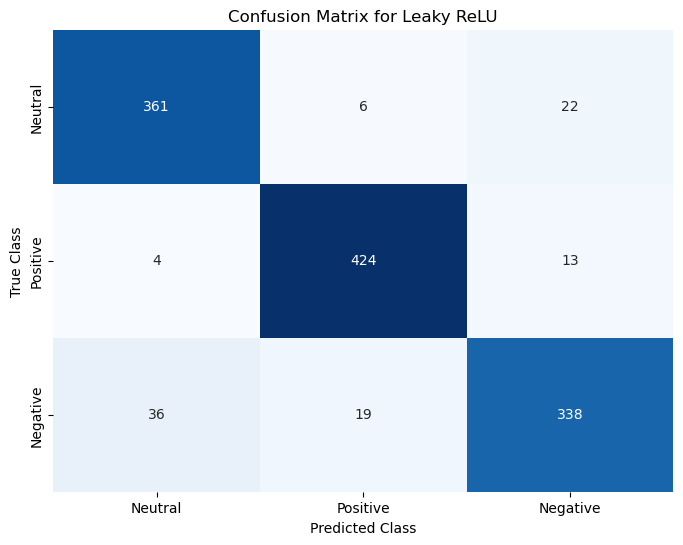

In [ ]:
import numpy as np

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"],
            vmin=np.min(conf_mat), vmax=np.max(conf_mat))
plt.title("Confusion Matrix for Leaky ReLU")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


Epoch [1/7], Train Loss: 0.5812, Val Loss: 0.3513, Train Accuracy: 0.7724, Val Accuracy: 0.8741
Epoch [2/7], Train Loss: 0.1708, Val Loss: 0.3307, Train Accuracy: 0.9400, Val Accuracy: 0.8913
Epoch [3/7], Train Loss: 0.0731, Val Loss: 0.4139, Train Accuracy: 0.9749, Val Accuracy: 0.8904
Epoch [4/7], Train Loss: 0.0411, Val Loss: 0.4474, Train Accuracy: 0.9848, Val Accuracy: 0.8953
Epoch [5/7], Train Loss: 0.0259, Val Loss: 0.4926, Train Accuracy: 0.9899, Val Accuracy: 0.8986
Epoch [6/7], Train Loss: 0.0146, Val Loss: 0.5135, Train Accuracy: 0.9923, Val Accuracy: 0.9002
Epoch [7/7], Train Loss: 0.0130, Val Loss: 0.4998, Train Accuracy: 0.9939, Val Accuracy: 0.9109


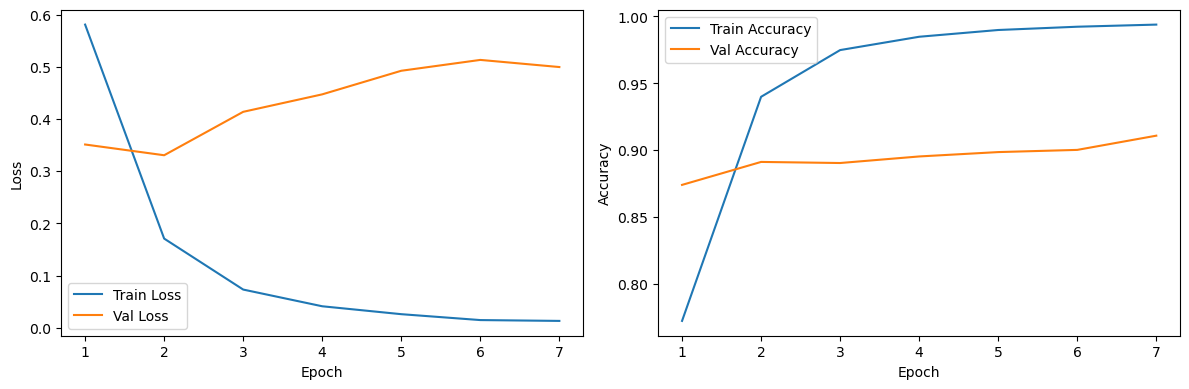

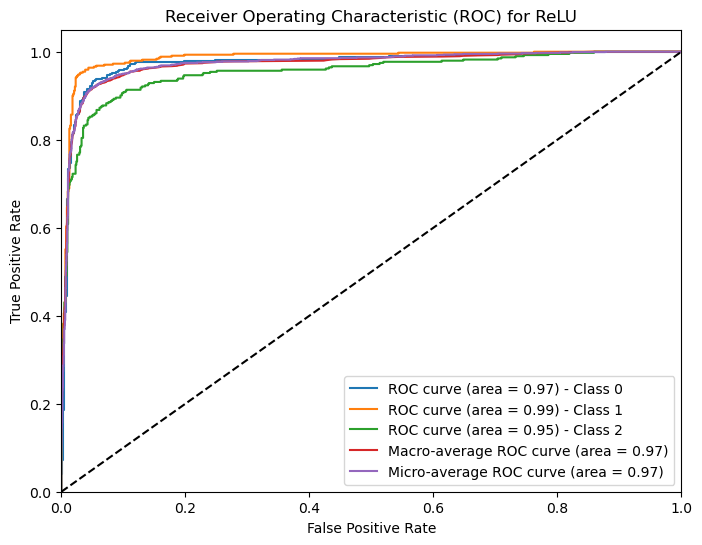

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       389
           1       0.93      0.96      0.95       441
           2       0.91      0.83      0.87       393

    accuracy                           0.91      1223
   macro avg       0.91      0.91      0.91      1223
weighted avg       0.91      0.91      0.91      1223

Accuracy: 0.910874897792314


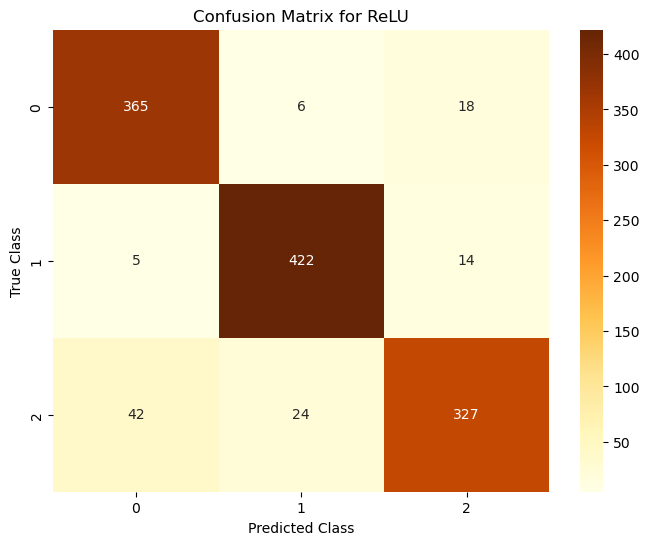

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate synthetic multi-class dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Convert data to PyTorch tensors
X_train = torch.Tensor(X_train.toarray())
X_test = torch.Tensor(X_test.toarray())
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the deep neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 512)  # Adjust input size to match the number of features
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 3)  # 3 output classes



    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        x = F.relu(x)
        return x

# Create an instance of the neural network model
dnn_classifier = NeuralNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dnn_classifier.parameters(), lr=0.001)

# Train the deep neural network
num_epochs = 7
batch_size = 32
num_batches = len(X_train) // batch_size

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0
    epoch_train_correct = 0
    epoch_val_correct = 0

    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        inputs = X_train[start_idx:end_idx]
        targets = y_train[start_idx:end_idx]

        # Forward pass
        outputs = dnn_classifier(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item() * inputs.size(0)
        epoch_train_correct += torch.sum(torch.argmax(outputs, dim=1) == targets).item()

    epoch_train_loss /= len(X_train)
    epoch_train_accuracy = epoch_train_correct / len(X_train)

    with torch.no_grad():
        dnn_classifier.eval()
        val_outputs = dnn_classifier(X_test)
        val_loss = criterion(val_outputs, y_test)
        val_predictions = torch.argmax(val_outputs, dim=1)
        val_accuracy = torch.sum(val_predictions == y_test).item() / len(X_test)

    train_losses.append(epoch_train_loss)
    val_losses.append(val_loss.item())
    train_accuracies.append(epoch_train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss.item():.4f}, "
          f"Train Accuracy: {epoch_train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the trained model
with torch.no_grad():
    dnn_classifier.eval()
    y_scores = F.softmax(dnn_classifier(X_test), dim=1).numpy()

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

classes = np.unique(y)

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_scores[:, i])

# Compute macro-average ROC curve and ROC area
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(len(classes)):
    tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= len(classes)
roc_auc_macro = roc_auc_score(y_test_bin, y_scores, average='macro')

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_scores, average='micro')

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) - Class %d' % (roc_auc[i], i))

# Plot macro-average ROC curve
plt.plot(fpr_macro, tpr_macro, label='Macro-average ROC curve (area = %0.2f)' % roc_auc_macro)

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for ReLU')
plt.legend(loc="lower right")
plt.show()

# Predict the labels for the test set
with torch.no_grad():
    dnn_classifier.eval()
    y_pred = dnn_classifier(X_test)
    y_pred = torch.argmax(y_pred, dim=1).numpy()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix for ReLU")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()



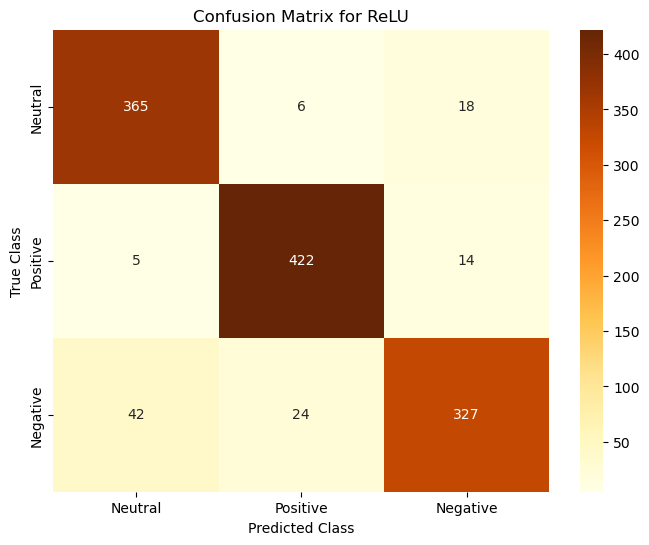

In [ ]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"],
            vmin=np.min(conf_mat), vmax=np.max(conf_mat))

plt.title("Confusion Matrix for ReLU")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


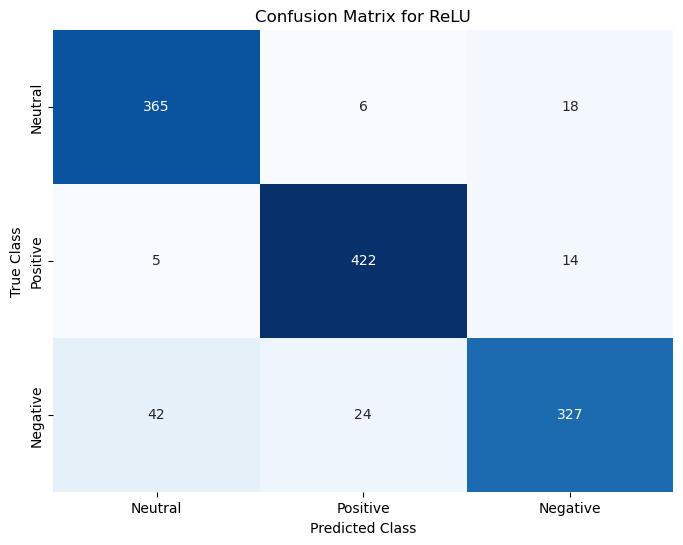

In [ ]:
import numpy as np

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Neutral", "Positive", "Negative"],
            yticklabels=["Neutral", "Positive", "Negative"],
            vmin=np.min(conf_mat), vmax=np.max(conf_mat))
plt.title("Confusion Matrix for ReLU")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [ ]:
X_train.shape[1]

7008